In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
%matplotlib inline

# 2017 SA Survey

In [292]:
path = "../2017/Student Feedback Surveys-Superview.csv"
df_2017 = pd.read_csv(path)
df_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


In [293]:
df_2017_week1_LA = df_2017[(df_2017["Week"]=="Week 1") & (df_2017["Location"]=="Los Angeles")]
df_2017_week1_LA

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
1,36,Los Angeles,Apps,Week 1,4,A little too fast
20,37,Los Angeles,Games,Week 1,6,Just right
45,26,Los Angeles,Apps,Week 1,7,A little too fast
46,35,Los Angeles,Apps,Week 1,7,Just right
104,29,Los Angeles,Apps,Week 1,8,A little too fast
105,31,Los Angeles,Games,Week 1,8,A little too fast
258,27,Los Angeles,Games,Week 1,9,Just right
259,30,Los Angeles,Apps,Week 1,9,Just right
260,32,Los Angeles,Apps,Week 1,9,A little too fast
261,33,Los Angeles,Games,Week 1,9,Just right


In [294]:
# Make Schedule Pacing Integers
schedules = df_2017["Schedule Pacing"]
schedulesKey = {"Just right" : 3, "A little too fast" : 4, "A little too slow" : 2, "Way too slow" : 1, "Way too fast" : 5}
newSchedules = np.array([])

for string in schedules:
    if string in schedulesKey:
        newSchedules = np.append(newSchedules, int(schedulesKey[string]))
    else:
        newSchedules = np.append(newSchedules, None)

schedF = pd.DataFrame(newSchedules)
df_2017["Schedule Pacing"] = schedF

In [295]:
# Make Weeks Integers
weeks = df_2017["Week"]
newWeeks = np.array([])

for string in weeks:
    newWeeks = np.append(newWeeks, int(string[-1]))

weekDf = pd.DataFrame(newWeeks)
df_2017["Week"] = weekDf
df_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1.0,3,3
1,36,Los Angeles,Apps,1.0,4,4
2,117,San Francisco,Games,1.0,4,1
3,253,NaN,NaN,2.0,4,4
4,350,New York City,"Apps, Explorer",1.0,4,3
5,23,Redwood City,Apps,1.0,5,3
6,28,Los Angeles,Apps,7.0,5,3
7,65,San Francisco,Apps,1.0,5,2
8,101,Santa Clara,Apps,1.0,5,2
9,124,Santa Clara,Apps,1.0,5,3


In [296]:
# Make Ratings Strings for NPS
ratings = df_2017["Rating (Num)"]
newRatings = np.array([])

for num in ratings:
    if not num == "nan" and not num == "#ERROR!":
        if float(num) > 8:
            newRatings = np.append(newRatings, "Promoter")
        elif float(num) > 6:
            newRatings = np.append(newRatings, "Passive")
        else:
            newRatings = np.append(newRatings, "Detractor")
    else:
        newRatings = np.append(newRatings, "NaN")


ratingDf = pd.DataFrame(newRatings)
df_2017["Rating (Num)"] = ratingDf
df_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1.0,Detractor,3
1,36,Los Angeles,Apps,1.0,Detractor,4
2,117,San Francisco,Games,1.0,Detractor,1
3,253,NaN,NaN,2.0,Detractor,4
4,350,New York City,"Apps, Explorer",1.0,Detractor,3
5,23,Redwood City,Apps,1.0,Detractor,3
6,28,Los Angeles,Apps,7.0,Detractor,3
7,65,San Francisco,Apps,1.0,Detractor,2
8,101,Santa Clara,Apps,1.0,Detractor,2
9,124,Santa Clara,Apps,1.0,Detractor,3


In [297]:
def calNps():
    npsScores = []
    for i in range(1,9):
        df_each_week = df_2017[df_2017["Week"] == i]
        promotersAmount = df_each_week[df_each_week["Rating (Num)"] == "Promoter"].size
        detractorsAmount = df_each_week[df_each_week["Rating (Num)"] == "Detractor"].size
        passiveAmount = df_each_week[df_each_week["Rating (Num)"] == "Passive"].size
        nps = (promotersAmount - detractorsAmount) / (promotersAmount + detractorsAmount + passiveAmount)
        npsScores = np.append(npsScores, nps * 100)
    return npsScores

In [298]:
def calave():
    pacing_ave = []
    for i in range(1, 9):
        df_each_week = df_2017[df_2017["Week"]==i]
        mean = np.mean(df_each_week["Schedule Pacing"])
        pacing_ave = np.append(pacing_ave, mean)
    return pacing_ave

(-100, 100)

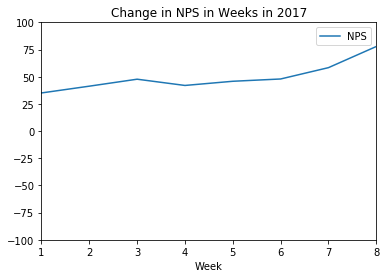

In [299]:
means = calave()
npsScores = calNps()
TNR = {"Week": [], "Satisfaction": [], "NPS" : []}
for i in range(1,9):
    TNR["NPS"].append(npsScores[i-1])
    TNR["Satisfaction"].append(means[i-1])
    TNR["Week"].append(i)
TNR = pd.DataFrame(TNR)
TNR.plot(x="Week", y="NPS", title="Change in NPS in Weeks in 2017")
plt.xlim(1,8)
plt.ylim(-100,100)

(0, 5)

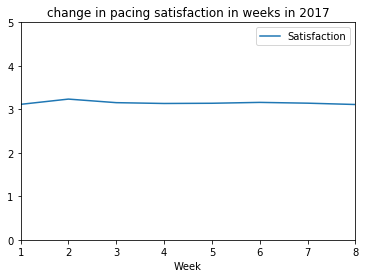

In [309]:
TNR.plot(x="Week", y="Satisfaction", title="change in pacing satisfaction in weeks in 2017")
plt.xlim(1,8)
plt.ylim(0,5)

# 2016 Summer Academy Survey

In [89]:
# Combine the CSV Files together in one Dataframe
list_all_week =[]

for i in range(1,8):
    list_file = []
    city = ""
    for name in glob.glob('./Anon Week ' + str(i) + "*"):
        city = name[-6:-4]
        df = pd.read_csv(name)
        if city == "re" or city == 'SG':
            city = "Singapore"
        elif city == "yo":
            city = "Tokyo"
        elif city == "ei":
            city = "Taipei"
        elif city == 'LA':
            city = 'Los Angeles'
        elif city == 'SF':
            city = "San Francisco"
        elif city == 'NY':
            city = 'New York City'
        elif city == 'SV':
            city = 'Sunnyvale'
        elif city == 'HK':
            city = 'Hong Kong'
        df["Location"] = city
        list_file.append(df)
    df_2016 = pd.concat(list_file)
    df_2016["Week"] = i
    list_all_week.append(df_2016)
df_2016 = pd.concat(list_all_week)

In [90]:
# Combine Pacing Columns together
paces = df_2016[["How well are the tutorials paced?", "How well is the schedule paced?"]]
paces = paces["How well are the tutorials paced?"].fillna(paces["How well is the schedule paced?"])
new_paces = []
for pace in paces:
    if not pace == "#REF!":
        new_paces.append(pace)
    else:
        new_paces.append("NaN")
df_2016 = df_2016.drop("How well are the tutorials paced?", 1)
df_2016 = df_2016.drop("How well is the schedule paced?", 1)
df_2016["Schedule Pacing"] = new_paces

In [91]:
df_2016 = df_2016.drop("Timestamp", 1)
df_2016 = df_2016.drop("Unnamed: 0", 1)
df_2016 = df_2016.rename(columns = {"How would you rate your overall satisfaction with the Summer Academy this week?" : "Rating (Num)", "What track are you in?" : "Track"})

In [92]:
def nps_rating(number_rating):
    newRatings = np.array([])

    for num in number_rating:
        if not num == "#REF!":
            if float(num) > 4:
                newRatings = np.append(newRatings, "Promoter")
            elif float(num) > 3:
                newRatings = np.append(newRatings, "Passive")
            else:
                newRatings = np.append(newRatings, "Detractor")
        else:
            newRatings = np.append(newRatings, "NaN")
    nps_ratingDf = pd.DataFrame(newRatings)
    return nps_ratingDf

In [93]:
ratings = df_2016["Rating (Num)"]
df_2016["Rating (Num)"] = nps_rating(ratings)
df_2016

,Rating (Num),Location,Week,Track,Schedule Pacing
0,Detractor,Singapore,1,NaN,3
1,Detractor,Singapore,1,NaN,3
2,Detractor,Singapore,1,NaN,3
3,Passive,Singapore,1,NaN,4
4,Passive,Singapore,1,NaN,4
5,Passive,Singapore,1,NaN,4
6,Passive,Singapore,1,NaN,3
7,Passive,Singapore,1,NaN,3
8,Passive,Singapore,1,NaN,4
9,Passive,Singapore,1,NaN,3


In [94]:
path = "Week 8 Feedback (2016, incomplete) - results.csv"
df_2016_week8 = pd.read_csv(path)
df_2016_week8

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f
5,9030d8a662b39b519b2b685834413d66,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13,088e6f938d
6,1c07190c7caa72bf6b59cea48e1a4a97,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14,00f1d07a90
7,27a63d6c24710feb52c0cfdef7e01175,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15,e0724aac23
8,b47b95f84547d8347119de1da5faa46d,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21,9eeec0f9bf
9,828fafa477484f61d2ca5930fe99ad46,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27,6c80fd2754


In [95]:
df_2016_week8 = df_2016_week8.drop("Start Date (UTC)", 1)
df_2016_week8 = df_2016_week8.drop("Submit Date (UTC)", 1)
df_2016_week8 = df_2016_week8.drop("#", 1)
df_2016_week8 = df_2016_week8.drop("Network ID", 1)
df_2016_week8 = df_2016_week8.rename(columns={"How likely is it that you would recommend the Make School Summer Academy to a friend?" : 'Rating (Num)'})
df_2016_week8 = df_2016_week8.rename(columns={"location" : 'Location'})
df_2016_week8 = df_2016_week8.rename(columns={"track" : 'Track'})
df_2016_week8["Week"] = 8
df_2016_week8["Schedule Pacing"] = np.nan

In [96]:
tracks = df_2016_week8['Track']
for i in range(len(tracks)):
    tracks[i] = tracks[i].replace("summer", '')
df_2016_week8['Track'] = tracks

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
df_2016_week8 = df_2016_week8.sort_values(['Location', 'Track'], ascending=[1, 1])

In [98]:
ratings = df_2016_week8["Rating (Num)"]
df_2016_week8["Rating (Num)"] = nps_rating(ratings)
df_2016_week8

,Rating (Num),Location,Track,Week,Schedule Pacing
14,Promoter,Los Angeles,Games,8,NaN
45,Promoter,Los Angeles,Games,8,NaN
50,Promoter,Los Angeles,Games (4-week),8,NaN
0,Promoter,New York,Apps,8,NaN
39,Promoter,New York,Apps,8,NaN
47,Promoter,New York,Apps,8,NaN
52,Promoter,New York,Apps,8,NaN
43,Promoter,New York,Apps (4-week),8,NaN
7,Promoter,New York,Games,8,NaN
9,Promoter,New York,Games,8,NaN


In [99]:
df_2016=df_2016.append(df_2016_week8)
df_2016

,Location,Rating (Num),Schedule Pacing,Track,Week
0,Singapore,Detractor,3,NaN,1
1,Singapore,Detractor,3,NaN,1
2,Singapore,Detractor,3,NaN,1
3,Singapore,Passive,4,NaN,1
4,Singapore,Passive,4,NaN,1
5,Singapore,Passive,4,NaN,1
6,Singapore,Passive,3,NaN,1
7,Singapore,Passive,3,NaN,1
8,Singapore,Passive,4,NaN,1
9,Singapore,Passive,3,NaN,1


In [100]:
def calNps_2016():
    npsScores = []
    for i in range(1,9):
        df_each_week = df_2016[df_2016["Week"] == i]
        promotersAmount = df_each_week[df_each_week["Rating (Num)"] == "Promoter"].size
        detractorsAmount = df_each_week[df_each_week["Rating (Num)"] == "Detractor"].size
        passiveAmount = df_each_week[df_each_week["Rating (Num)"] == "Passive"].size
        nps = (promotersAmount - detractorsAmount) / (promotersAmount + detractorsAmount + passiveAmount)
        npsScores = np.append(npsScores, nps * 100)
    return npsScores

In [101]:
def calave_2016():
    pacing_ave = []
    for i in range(1, 9):
        df_each_week = df_2016[df_2016["Week"]==i]
        mean = np.mean(df_each_week["Schedule Pacing"])
        pacing_ave = np.append(pacing_ave, mean)
    return pacing_ave

(-100, 100)

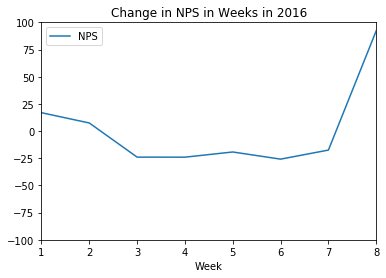

In [102]:
# means = calave_2016()
npsScores = calNps_2016()
TNR_2016 = {"Week": [], "NPS" : []}
for i in range(1,9):
    TNR_2016["NPS"].append(npsScores[i-1])
#     TNR["Satisfaction"].append(means[i-1])
    TNR_2016["Week"].append(i)
TNR_2016 = pd.DataFrame(TNR_2016)
TNR_2016.plot(x="Week", y="NPS", title="Change in NPS in Weeks in 2016")
plt.xlim(1,8)
plt.ylim(-100,100)